### Importing necessary libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

### 1. Generating a spectrum of stellar masses between 0.1 to 50 solar masses and plotting the IMF (Initial Mass Function) as a histogram


The mass range with the maximum frequency is between 0.10 and 0.15 Solar Masses.
The mass with the maximum frequency is approximately 0.12 Solar Masses.


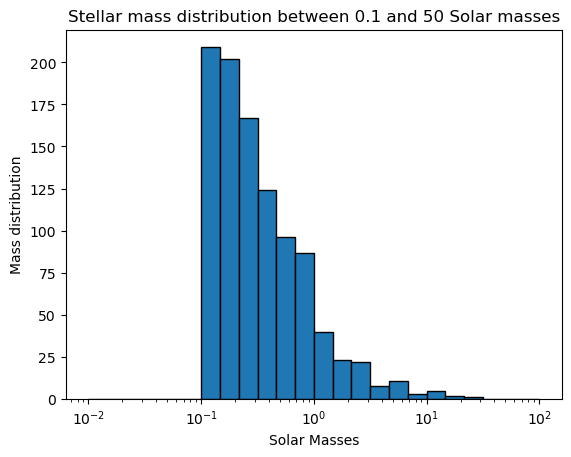

In [107]:
# Setting up the values of the parameters
alpha = 2.3
beta = 1.4
M_sun = 1 #Setting the mass of sun equal to one
mu = 0.2  # Value of 'μ' assuming M_sun = 1
m_upp = 50  
m_low = 0.1 

# Auxillary function G(m)
def G(m):
    return (1 + (m / mu) ** (1 - alpha)) ** (1 - beta)

# Random number u
u = np.random.rand(1000)

# Quantile function m(u)
def mass(u):
    return mu * ((u * (G(m_upp) - G(m_low)) + G(m_low)) ** (1 / (1 - beta)) - 1) ** (1 / (1 - alpha))

# Generate mass values
mass_values = mass(u)

# Calculate the histogram data
hist, bin_edges = np.histogram(mass_values, bins=np.logspace(-2, 2, 25))

# Find the bin with the maximum frequency
max_freq_index = np.argmax(hist)
max_freq_mass_range = (bin_edges[max_freq_index], bin_edges[max_freq_index + 1])
max_freq_mass = np.sqrt(max_freq_mass_range[0] * max_freq_mass_range[1])

print(f"The mass range with the maximum frequency is between {max_freq_mass_range[0]:.2f} and {max_freq_mass_range[1]:.2f} Solar Masses.")
print(f"The mass with the maximum frequency is approximately {max_freq_mass:.2f} Solar Masses.")

# Plot the histogram
plt.hist(mass_values, bins=np.logspace(-2,2,25), edgecolor='black')
plt.xlabel("Solar Masses")
plt.ylabel("Mass distribution")
plt.xscale('log')
plt.title("Stellar mass distribution between 0.1 and 50 Solar masses")
plt.savefig('Final IMF')
plt.show()

#### 2. Finding the disc masses and the radii of the discs as a function of stellar masses in the above IMF


In [129]:
def radius(m):
    return 200*(mass(u))**0.3 #Since M_sun is assumed 1
#print(radius(mass(u))) # Hashtagging, since its not necessary to print. 

#for Disc Mass
def disc_mass(mass):
    return 0.001*mass(u) 
#print(disc_mass(mass)) # Hashtagging, since its not necessary to print. 

### 3. Finding the Collision time between protoplanetary discs and Oumuamua-like Objects.


#### 3.1 First calculating collision time of Oumuamua-like objects with Earth

In [100]:
u_values = np.random.rand(1000)

# Calculate mass values
m_values = mass(u_values)

# Collision parameters
n_0 = 0.1 / ((1.5e11)**3)  # Units per cubic meter
v_esc_Earth = 11200  # m/s ; Escape velocity of Earth
v_o = 26320.9  # m/s

radius_e = 6.371e6  # Radius of Earth in meters

# Function to calculate collision time for Earth
def t_coll_1(radius_e): 
    C_earth = (np.pi * (radius_e)**2) * (1 + (v_esc_Earth**2) / (v_o**2))
    t_coll_1 = 1 / (n_0 * C_earth * v_o)
    return t_coll_1
print('Collision times for Earth: ', t_coll_1(radius_e) / 86400 / 365 / 10**6, "Mega years")

Collision times for Earth:  269.97748192766664 Mega years


#### 3.2 Calculating collision time of Oumuamua-like objects with the Solar System

In [11]:
radius_Solar_Sys = 200*1.5e11  # Radius of Solar system in meters
v_esc_solar_sys  = 16500

# Function to calculate collision time for Solar System
def t_coll_0(radius_Solar_Sys): 
    C_earth = (np.pi * (radius_Solar_Sys)**2) * (1 + (v_esc_solar_sys**2) / (v_o**2))
    t_coll_0 = 1 / (n_0 * C_earth * v_o)
    return t_coll_0
print('Collision times for Solar System: ', t_coll_0(radius_Solar_Sys)/60, "minutes")

Collision times for Solar System:  5.426073414656035 minutes


#### 3.3 Calculating the collitional times of the Oumuamua-like rocks with the star system described by the IMF generated in step 1.

In [133]:
def v_esc(radius, mass):
    G = 6.67e-11
    return (2*G * mass/radius)**0.5

# Function to calculate collision time for the star systems
def t_coll_2(m_values):
    # Calculate radii in AU
    radii = radius(m_values)
    
    # Convert radii from AU to meters
    radii_meters = radii * 1.496e11  # 1 AU = 1.496e11 meters
    
    # Calculate cross-sectional area C_solar_system in square meters
    C_star_system = np.pi * (radii_meters ** 2) * (1 + (v_esc(radii_meters, m_values))**2/v_o**2)
    
    # Calculate collision time in seconds
    t_coll_2 = 1 / (n_0 * C_star_system * v_o)
    
    return t_coll_2
    
# Calculate collision times for star system
collision_times = t_coll_2(m_values)

#print('Collision times for sample star systems:', collision_times* 3.154e7 / 86400 / 365/60 , 'minutes') # Hashtagging, since its not necessary to print. 

### 4. Calculating survival times of bacteria with the ejecta


#### Description

For the lower and upper limits of the rock radii, we use the lower limit as the radius corresponding to a mass of 1000 grams and the upper limit as the radius corresponding to the mass of the Moon (7.3 × 10²⁵ grams) and density equal to that of the Oumuamua.

```python
rho = 1.5  # Density of ʻOumuamua-like objects [1.5, 2.8] g/cc (McNeill et al. 2018, https://iopscience.iop.org/article/10.3847/2041-8213/aab9ab/pdf)

# Assuming the Oumuamua-like objects to be sphere for simplicity of calculation. Defining their volume: 
vol = (4/3) * np.pi * r**3


#### 4.1 Defining the extremum values of parameters and calculating the survival times

In [93]:
#Units in cgs
m_low = 1000 
m_upp = 7.3e25
v_low = m_low/1.5  #mass/density
v_upp = m_upp/1.5
r_low = (((m_low*3)/(4 *1.5* np.pi))**0.33)/100
r_upp = (((m_upp * 3)/(4*1.5 * np.pi))**0.33)/100

#Let, 
r = np.linspace(r_low, r_upp, 1000)  #Thousand equally spaced distributions

def t(r):
    t = 75 * (r/100) **2
    return t
#print("Survival times of bacteria in sizes corresponding to lower mass 1000g and upper mass equivalent to Moon's mass with a constant density of 0.1g/cc: ", t(r))  

### 4.2 Plot of the survival times vs the radii


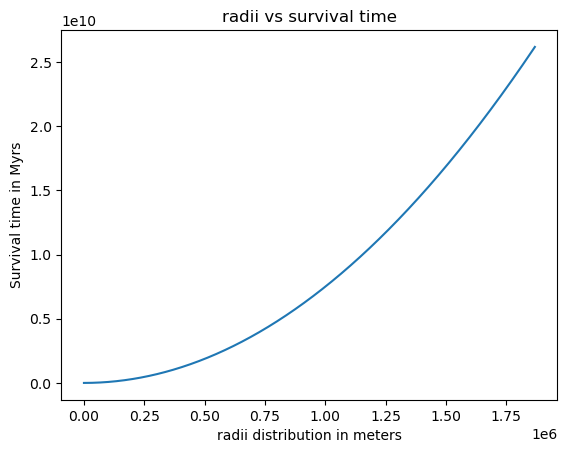

In [142]:
plt.plot(r, t(r))
plt.title('radii vs survival time')
plt.xlabel('radii distribution in meters')
plt.ylabel('Survival time in Myrs')
plt.savefig(f'Final Survival times against radii')
plt.show()

## 5. Plotting Collisional times vs protoplanetary disc with survival times as horizontal lines


#### 5.1 Defining Number Densities of the ʻOumuamua-Like Objects and Their Velocities


In [20]:
densities = [0.01, 0.05, 0.1, 1]  # per cubic AU

# Convert densities to per cubic meter
densities_m3 = [density / ((1.5e11)**3) for density in densities]

velocities = [1000, 10000, 26320, 50000]  # m/s

#### 5.2 Final calculation and plotting

Minimum survival time: 2.20e-05 seconds
Median survival time: 9.62e+09 seconds
Maximum survival time: 3.85e+10 seconds


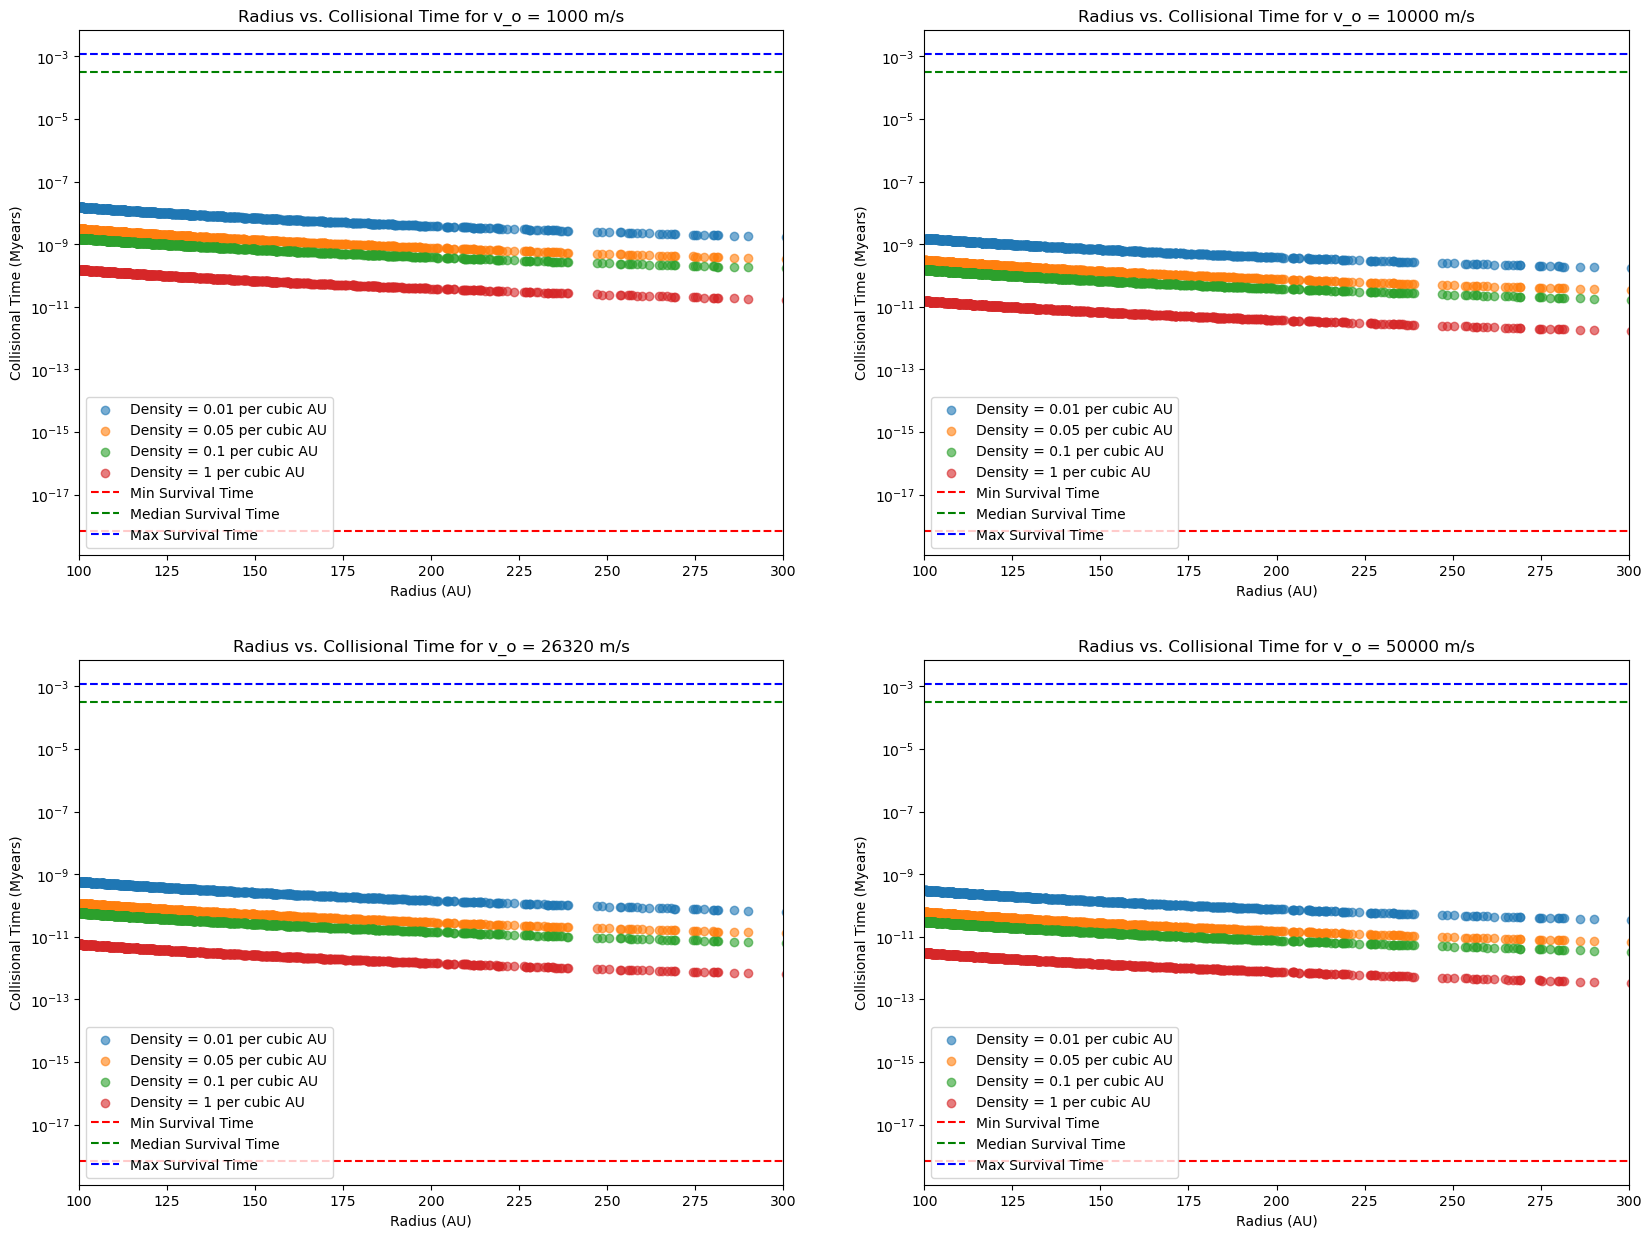

In [144]:
# Redefining collisional time function for the star systems to incoroporate the above values of denisities and velocities.
def t_coll_2(m_values, n_0, v_o):
    # Calculate radii in AU
    radii = radius(m_values)
    
    # Convert radii from AU to meters
    radii_meters = radii * 1.496e11  # 1 AU = 1.496e11 meters
    
    # Calculate cross-sectional area C_star_system in square meters
    C_star_system = np.pi * (radii_meters ** 2) * (1 + (v_esc(radii_meters, m_values))**2 / v_o**2)
    
    # Calculate collision time in seconds
    t_coll_2 = 1 / (n_0 * C_star_system * v_o)
    
    return t_coll_2, radii

# Initialize results dictionary
results = {}

# Generate distributions and calculate collision times
for v_o in velocities:
    results[v_o] = {}
    for n_0 in densities_m3:
        t_coll_star_system, radii = t_coll_2(m_values, n_0, v_o)
        results[v_o][n_0] = (t_coll_star_system, radii)

# Compute survival times for bacteria
rho = 1.5  # Density in g/cc
m_low_cgs = 1000  # grams
m_upp_cgs = 7.3e25  # grams

v_low = m_low_cgs / rho  # volume in cm^3
v_upp = m_upp_cgs / rho  # volume in cm^3

r_low = (((v_low * 3) / (4 * np.pi)) ** (1/3)) / 100  # convert to meters
r_upp = (((v_upp * 3) / (4 * np.pi)) ** (1/3)) / 100  # convert to meters

r = np.linspace(r_low, r_upp, 1000)  # Thousand equally spaced distributions

# Survival time function
def t_survival(r):
    return 75 * (r / 100) ** 2

survival_times = t_survival(r)

# Calculate minimum, median, and maximum survival times
min_survival_time = np.min(survival_times)
median_survival_time = np.median(survival_times)
max_survival_time = np.max(survival_times)

print(f"Minimum survival time: {min_survival_time:.2e} seconds")
print(f"Median survival time: {median_survival_time:.2e} seconds")
print(f"Maximum survival time: {max_survival_time:.2e} seconds")

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()

for i, v_o in enumerate(velocities):
    ax = axs[i]
    for density, n_0 in zip(densities, densities_m3):
        times, radii = results[v_o][n_0]
        ax.scatter(radii, times/3.15e13, label=f'Density = {density} per cubic AU', alpha=0.6)
        
    # Plot survival times as horizontal lines
    ax.axhline(min_survival_time/3.15e13, color='r', linestyle='dashed', label='Min Survival Time')
    ax.axhline(median_survival_time/3.15e13, color='g', linestyle='dashed', label='Median Survival Time')
    ax.axhline(max_survival_time/3.15e13, color='b', linestyle='dashed', label='Max Survival Time')
    
    ax.set_xlim(100, 300)
    
    #ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Radius (AU)')
    ax.set_ylabel('Collisional Time (Myears)')
    ax.set_title(f'Radius vs. Collisional Time for v_o = {v_o} m/s')
    ax.legend()
plt.savefig(f'correct plot')
#plt.tight_layout()
plt.show()